# IMPORT LIBRARIES

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

from sklearn.model_selection import GroupKFold
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# SET AND RESET ROWS AND COLS

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# READ CSV FILE

In [5]:
df1 = pd.read_csv('gaze_fixation_nlp_pp_z_null_data.csv')
df1

,Participant,Paragraph,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,PP_3_JJS,PP_3_MD,PP_3_VB,PP_3_RB,PP_3_VBZ,PP_3_RBS,PP_3_JJR,PP_3_WRB,PP_3_RBR,TUT
0,593890eac6aa16000101f037,4,0.255628,-0.240734,0.769459,1.160247,0.735440,0.179377,0.603954,1.070321,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,1
1,596e1af7a09655000197d4bb,4,-0.138104,-0.377558,0.353201,0.345376,-0.276889,-0.731723,0.642485,0.606842,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0
2,5af835d8e19f8c00019e6dc0,4,1.665935,1.103180,-0.116301,0.622873,0.821858,0.364895,0.053511,0.319686,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0
3,5b07b71c68eff50001d1c859,4,-0.603115,-0.760665,0.730738,0.517160,-0.890047,-0.838912,0.152591,-0.002734,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,0
4,5bd7971b0aac450001f951aa,4,-0.204292,-0.502220,0.479046,0.768228,-0.470301,-0.542082,0.064520,0.304573,...,0.0,-0.408349,-0.632643,-0.935216,-0.544481,0.0,-0.408349,-0.408349,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,6295270587394aac7ce600db,36,-0.799981,-0.690733,-0.493838,-0.606040,-1.019675,-0.826544,-0.529958,-0.652611,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,2.448884,0.0,0
2355,63038702fea51556c37c36cf,36,-0.560687,-0.760665,0.914666,0.675729,-0.727498,-0.843034,0.692024,0.465783,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,2.448884,0.0,0
2356,63d17cf704d2d7053d56b962,36,-0.015911,0.200143,-0.585802,-0.597231,-0.334501,-0.183414,-0.551975,-0.572006,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,2.448884,0.0,1
2357,63d3fa78d12b38b131ef6b76,36,0.068945,-0.444450,-0.208265,-0.262473,-0.571122,-0.587431,-0.370329,-0.466212,...,0.0,-0.408349,-0.632643,0.000000,-0.544481,0.0,-0.408349,2.448884,0.0,1


In [6]:
df2 = pd.read_csv('demo_m.csv')
df2

,Participant,TUTMean,DisengageMean,AwarenessMean,FMTMean,TextRTMean,TestMean,ReadPrior,OffTaskStuck,OffTaskJump,...,OffScreenProp,PseudoDistance,GazesMean,TestMean2,comorbid,comorbid2,read,read2,GPP,goodeye
0,593890eac6aa16000101f037,0.428571,2.000000,5.428571,5.428571,8.150127,0.7,n,4,5,...,0.219261,0.435349,473.850,0.666667,1,0,0,0,58.140195,1
1,596e1af7a09655000197d4bb,0.000000,3.000000,6.714286,5.000000,8.258325,0.8,n,3,4,...,0.446412,0.561426,261.375,0.777778,0,0,0,0,31.649881,1
2,5af835d8e19f8c00019e6dc0,0.000000,1.000000,7.000000,6.857143,15.013760,0.8,n,4,3,...,0.421320,0.411960,902.525,0.777778,0,0,0,0,60.113189,1
3,5b07b71c68eff50001d1c859,0.285714,3.000000,5.000000,4.857143,8.980250,0.6,n,4,4,...,0.478640,0.327370,195.600,0.555556,0,0,0,0,21.781131,1
4,5bd7971b0aac450001f951aa,0.571429,1.000000,7.000000,7.000000,15.064745,0.8,n,3,3,...,0.417726,0.336496,329.600,0.777778,0,0,0,0,21.878897,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,6295270587394aac7ce600db,0.142857,4.000000,3.857143,4.428571,10.930252,0.7,n,4,5,...,0.232924,0.938216,177.525,0.666667,1,0,0,0,16.241619,1
350,63038702fea51556c37c36cf,0.571429,4.285714,5.142857,5.000000,7.708367,0.7,n,4,5,...,0.717183,1.071528,231.400,0.666667,1,0,0,0,30.019326,1
351,63d17cf704d2d7053d56b962,0.857143,2.857143,3.571429,3.428571,8.862255,0.8,n,2,2,...,0.053742,0.287048,506.600,0.777778,0,0,0,0,57.163781,1
352,63d3fa78d12b38b131ef6b76,1.000000,5.285714,7.000000,5.142857,8.167373,0.9,n,4,5,...,0.148826,0.474315,600.975,0.888889,1,1,0,0,73.582416,1


# SPLIT PARTICIPANTS INTO NEURODIVERGENT AND NEROTYPICAL AND DIAGNOSES

In [7]:
df2_condition = df2[['Participant', 'Condition', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8']]
df2_condition

,Participant,Condition,D1,D2,D3,D4,D5,D6,D7,D8
0,593890eac6aa16000101f037,Neurodivergent,1,0,0,0,1,1,0,0
1,596e1af7a09655000197d4bb,Neurodivergent,0,0,0,0,0,1,0,0
2,5af835d8e19f8c00019e6dc0,Neurotypical,0,0,0,0,0,1,0,0
3,5b07b71c68eff50001d1c859,Neurodivergent,0,0,0,0,0,0,1,0
4,5bd7971b0aac450001f951aa,Neurotypical,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
349,6295270587394aac7ce600db,Neurodivergent,1,0,0,0,1,1,0,0
350,63038702fea51556c37c36cf,Neurodivergent,0,1,0,0,1,0,0,0
351,63d17cf704d2d7053d56b962,Neurodivergent,0,1,0,0,0,0,0,0
352,63d3fa78d12b38b131ef6b76,Neurodivergent,1,1,1,0,1,1,0,0


In [8]:
# merge
all_data_null = pd.merge(df1, df2_condition, on=['Participant'])
all_data_null

,Participant,Paragraph,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,TUT,Condition,D1,D2,D3,D4,D5,D6,D7,D8
0,593890eac6aa16000101f037,4,0.255628,-0.240734,0.769459,1.160247,0.735440,0.179377,0.603954,1.070321,...,1,Neurodivergent,1,0,0,0,1,1,0,0
1,593890eac6aa16000101f037,10,-0.854289,-0.642084,-0.571281,-0.650087,0.229276,0.381386,-0.419869,-0.098452,...,0,Neurodivergent,1,0,0,0,1,1,0,0
2,593890eac6aa16000101f037,15,-0.618389,-0.529584,-0.430915,-0.469494,-0.620504,-0.393668,-0.408860,-0.310040,...,0,Neurodivergent,1,0,0,0,1,1,0,0
3,593890eac6aa16000101f037,20,0.214897,0.312642,-0.421235,-0.293306,-0.676059,-0.768827,-0.139144,-0.103490,...,1,Neurodivergent,1,0,0,0,1,1,0,0
4,593890eac6aa16000101f037,26,0.175863,0.340007,-0.116301,0.037047,0.128454,0.385508,-0.331798,0.113136,...,1,Neurodivergent,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,63e53dc0bb780ac38cdcf77e,15,0.919202,1.160950,-0.595482,-0.610445,0.920622,1.552211,-0.502436,-0.375532,...,1,Neurodivergent,1,1,0,1,0,0,0,0
2355,63e53dc0bb780ac38cdcf77e,20,2.663841,2.155203,0.125710,0.728586,-0.223392,0.043330,-0.607020,-0.723141,...,1,Neurodivergent,1,1,0,1,0,0,0,0
2356,63e53dc0bb780ac38cdcf77e,26,1.850921,2.124798,0.043427,0.728586,1.272468,1.626419,0.174609,0.722711,...,0,Neurodivergent,1,1,0,1,0,0,0,0
2357,63e53dc0bb780ac38cdcf77e,31,1.217895,1.832907,-0.576122,-0.531160,3.601647,6.169552,-0.596011,-0.652611,...,0,Neurodivergent,1,1,0,1,0,0,0,0


In [9]:
# all_data_null.to_csv("all_data_null.csv",index=False)

In [10]:
# all_data_no_null = all_data_null.dropna()

In [11]:
# all_data_no_null.to_csv("all_data_no_null.csv",index=False)

In [12]:
all_data_no_null

,Participant,Paragraph,PP_Gazes,PP_AOI_Gazes,PP_OffscreenPix,PP_OffscreenProp,PP_2_Gazes,PP_2_AOI_Gazes,PP_2_OffscreenPix,PP_2_OffscreenProp,...,TUT,Condition,D1,D2,D3,D4,D5,D6,D7,D8
0,593890eac6aa16000101f037,4,0.255628,-0.240734,0.769459,1.160247,0.735440,0.179377,0.603954,1.070321,...,1,Neurodivergent,1,0,0,0,1,1,0,0
1,593890eac6aa16000101f037,10,-0.854289,-0.642084,-0.571281,-0.650087,0.229276,0.381386,-0.419869,-0.098452,...,0,Neurodivergent,1,0,0,0,1,1,0,0
2,593890eac6aa16000101f037,15,-0.618389,-0.529584,-0.430915,-0.469494,-0.620504,-0.393668,-0.408860,-0.310040,...,0,Neurodivergent,1,0,0,0,1,1,0,0
3,593890eac6aa16000101f037,20,0.214897,0.312642,-0.421235,-0.293306,-0.676059,-0.768827,-0.139144,-0.103490,...,1,Neurodivergent,1,0,0,0,1,1,0,0
4,593890eac6aa16000101f037,26,0.175863,0.340007,-0.116301,0.037047,0.128454,0.385508,-0.331798,0.113136,...,1,Neurodivergent,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,63e53dc0bb780ac38cdcf77e,15,0.919202,1.160950,-0.595482,-0.610445,0.920622,1.552211,-0.502436,-0.375532,...,1,Neurodivergent,1,1,0,1,0,0,0,0
2355,63e53dc0bb780ac38cdcf77e,20,2.663841,2.155203,0.125710,0.728586,-0.223392,0.043330,-0.607020,-0.723141,...,1,Neurodivergent,1,1,0,1,0,0,0,0
2356,63e53dc0bb780ac38cdcf77e,26,1.850921,2.124798,0.043427,0.728586,1.272468,1.626419,0.174609,0.722711,...,0,Neurodivergent,1,1,0,1,0,0,0,0
2357,63e53dc0bb780ac38cdcf77e,31,1.217895,1.832907,-0.576122,-0.531160,3.601647,6.169552,-0.596011,-0.652611,...,0,Neurodivergent,1,1,0,1,0,0,0,0


In [20]:
# neurodivergent participants
df2_neurodivergent = df2_condition.query('Condition == "Neurodivergent"')
# count_neurodivergent = len(df_neurodivergent)
# print (count_neurotypical)

# neurotypical participants
df2_neurotypical = df2_condition.query('Condition == "Neurotypical"')

In [23]:
# #create two new files, one for participants that are neurotypical, and another for neurodivergent
# df2_neurodivergent.to_csv("neurodivergent_participants.csv", index=False)
# df2_neurotypical.to_csv("neurotypical_participants.csv", index=False)

In [24]:
df2_neurotypical = pd.read_csv('neurotypical_participants.csv')
df2_neurodivergent = pd.read_csv('neurodivergent_participants.csv')

In [26]:
# filter by neurdivergent and neurotypical participants
filter_neurotypical = pd.merge(df1, df2_neurotypical[['Participant']], on=['Participant'], how = 'inner')

filter_neurodivergent = pd.merge(df1, df2_neurodivergent[['Participant']], on=['Participant'], how = 'inner')


In [31]:
# filter_neurodivergent.to_csv("instances_with_neurodivergent_learners.csv",index=False)
# filter_neurotypical.to_csv("instances_with_neurotypical_learners.csv", index=False)

# REMOVE NULL VALUES FOR NEURODIVERGENT AND NEUROTYPICAL

In [4]:
# read csv files 
df_neurodivergent = pd.read_csv('instances_with_neurodivergent_learners.csv')
df_neurotypical = pd.read_csv('instances_with_neurotypical_learners.csv')

In [6]:
# check for null values in each column
df_neurodivergent.isnull().sum()

df_neurotypical.isnull().sum()


Participant        0
Paragraph          0
PP_Gazes           0
PP_AOI_Gazes       0
PP_OffscreenPix    0
                  ..
PP_3_RBS           1
PP_3_JJR           1
PP_3_WRB           1
PP_3_RBR           1
TUT                0
Length: 93, dtype: int64

In [7]:
# number of participants and instances before removing null values
neurodivergent_participants_null = df_neurodivergent.Participant.nunique()
print ('Number of participants with null values for neurodivergent = ', neurodivergent_participants_null)
neurodivergent_instances_null = len(df_neurodivergent)
print ("Number of instances with null values = ", neurodivergent_instances_null)

neurotypical_participants_null = df_neurotypical.Participant.nunique()
print ('Number of participants with null values for neurotypical = ', neurotypical_participants_null)
neurotypical_instances_null = len(df_neurotypical)
print ("Number of instances with null values = ", neurotypical_instances_null)

Number of participants with null values for neurodivergent =  166
Number of instances with null values =  1162
Number of participants with null values for neurotypical =  171
Number of instances with null values =  1197


In [8]:
# proportion of null vales in percentage %
ratio_of_null_values_divergent = round((df_neurodivergent.isnull().sum()/ len(df_neurodivergent)) * 100, 2)
ratio_of_null_values_typical = round((df_neurotypical.isnull().sum()/ len(df_neurotypical)) * 100, 2)


In [9]:
# remove null values
divergent_no_null = df_neurodivergent.dropna()
typical_no_null = df_neurotypical.dropna()


In [10]:
# number of participants and instances after removing null values
neurodivergent_participants_null = divergent_no_null.Participant.nunique()
print ('Number of participants with null values for neurodivergent = ', neurodivergent_participants_null)
neurodivergent_instances_null = len(divergent_no_null)
print ("Number of instances with null values = ", neurodivergent_instances_null)

neurotypical_participants_null = typical_no_null.Participant.nunique()
print ('Number of participants with null values for neurotypical = ', neurotypical_participants_null)
neurotypical_instances_null = len(typical_no_null)
print ("Number of instances with null values = ", neurotypical_instances_null)

Number of participants with null values for neurodivergent =  156
Number of instances with null values =  980
Number of participants with null values for neurotypical =  161
Number of instances with null values =  998


In [11]:
# save csv files
# divergent_no_null.to_csv("neurodivergent_data_no_null.csv",index=False)
# typical_no_null.to_csv("neurotypical_data_no_null.csv", index=False)

# MODELING

In [5]:
# read csv files 
divergent_no_null = pd.read_csv('neurodivergent_data_no_null.csv')
typical_no_null = pd.read_csv('neurotypical_data_no_null.csv')

## NEURODIVERGENT

Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 13


<Figure size 1100x700 with 0 Axes>

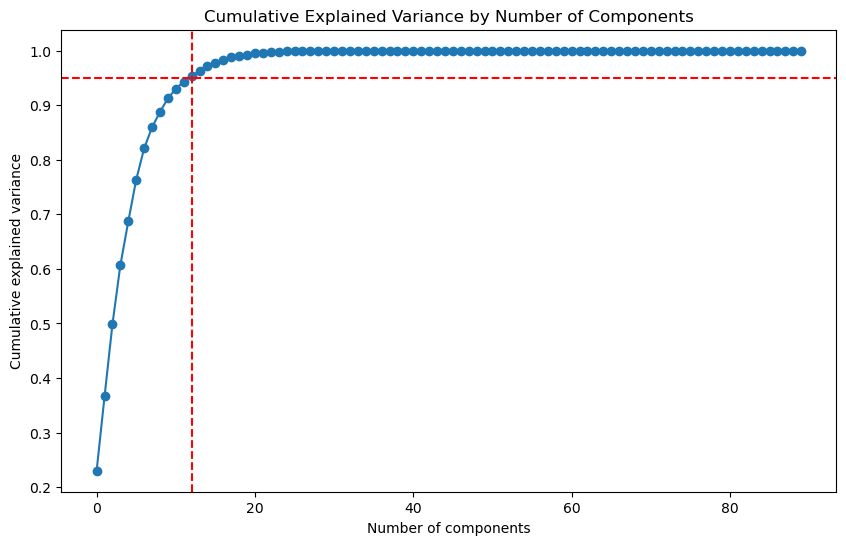

Chance Results:
Avg Accuracy: 0.54
Avg Weighted F1 Score: 0.54
Avg Precision_1: 0.40
Avg Recall_1: 0.40
Avg AUROC: 0.51
Avg Confusion Matrix:
[[76.4 43.8]
 [46.2 29.6]]
Avg Prediction Rate: 0.37

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.57
Avg Weighted F1 Score: 0.57
Avg Precision_1: 0.44
Avg Recall_1: 0.43
Avg AUROC: 0.55
Avg Confusion Matrix:
[[79.4 40.8]
 [43.6 32.2]]
Avg Prediction Rate: 0.37

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling

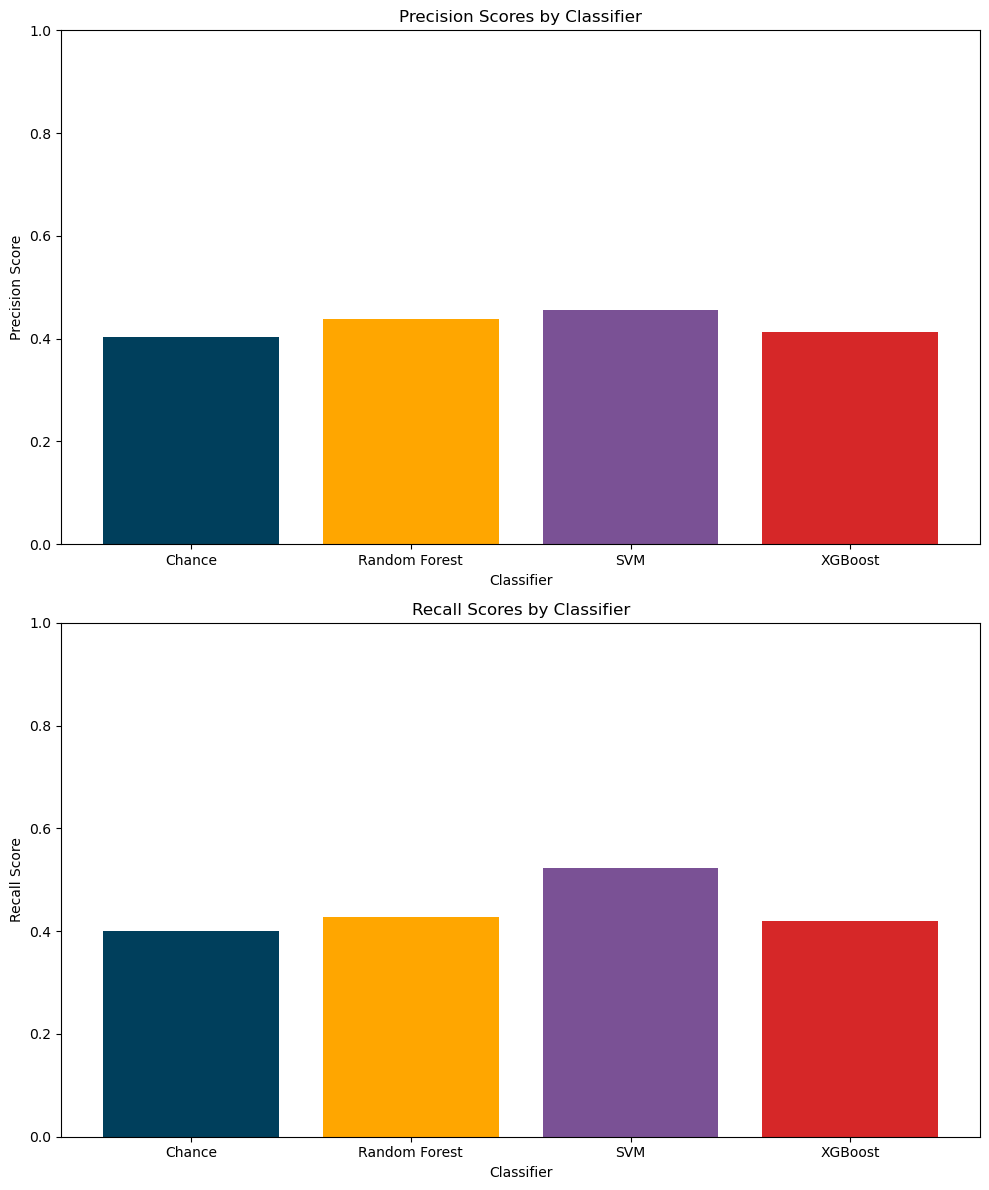

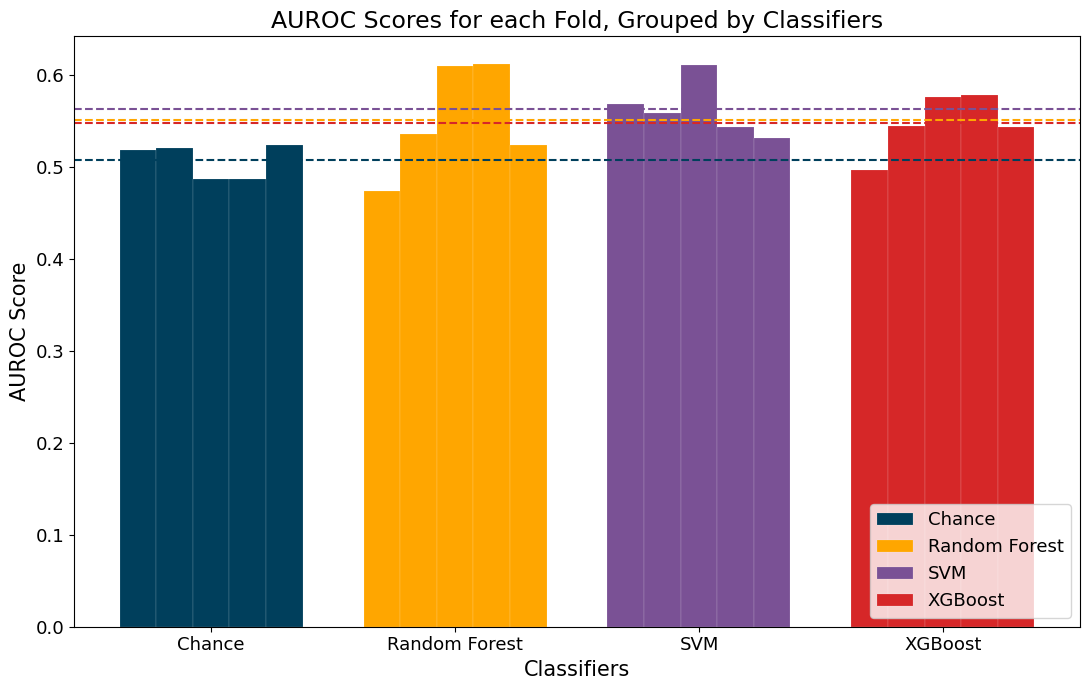

In [15]:
#AUROC
# Preparing the data
X = divergent_no_null.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = divergent_no_null['TUT']

# Identify majority and minority classes
majority_class = divergent_no_null['TUT'].value_counts().idxmax()
minority_class = divergent_no_null['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = divergent_no_null[divergent_no_null['TUT'] == majority_class].index
minority_indices = divergent_no_null[divergent_no_null['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=divergent_no_null['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()
plt.show()


## NEUROTYPICAL

Majority class 0
Minority class 1
Number of components that explain 95% of the variance: 13


<Figure size 1100x700 with 0 Axes>

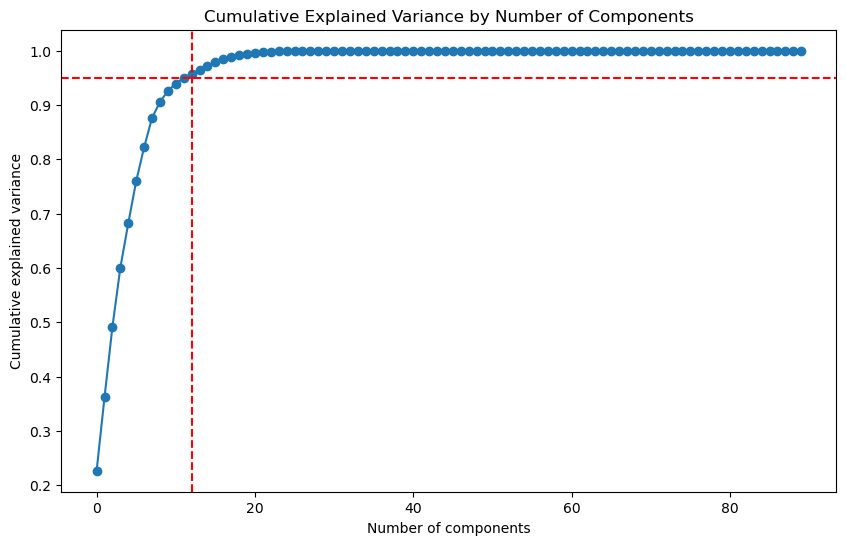

Chance Results:
Avg Accuracy: 0.63
Avg Weighted F1 Score: 0.62
Avg Precision_1: 0.29
Avg Recall_1: 0.27
Avg AUROC: 0.52
Avg Confusion Matrix:
[[111.   35.8]
 [ 38.6  14.2]]
Avg Prediction Rate: 0.25

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Results:
Avg Accuracy: 0.61
Avg Weighted F1 Score: 0.61
Avg Precision_1: 0.26
Avg Recall_1: 0.25
Avg AUROC: 0.49
Avg Confusion Matrix:
[[109.2  37.6]
 [ 39.6  13.2]]
Avg Prediction Rate: 0.25

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, t

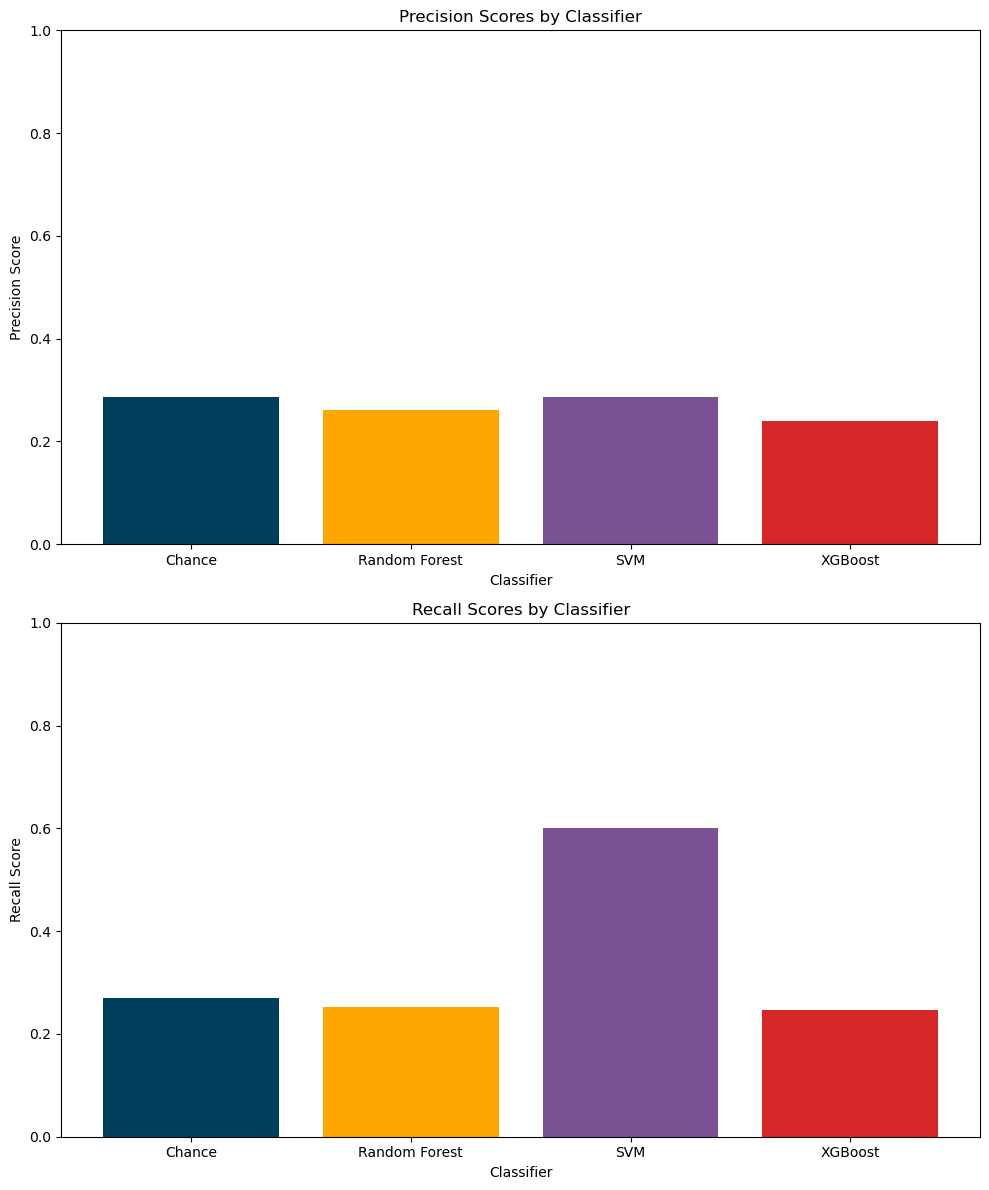

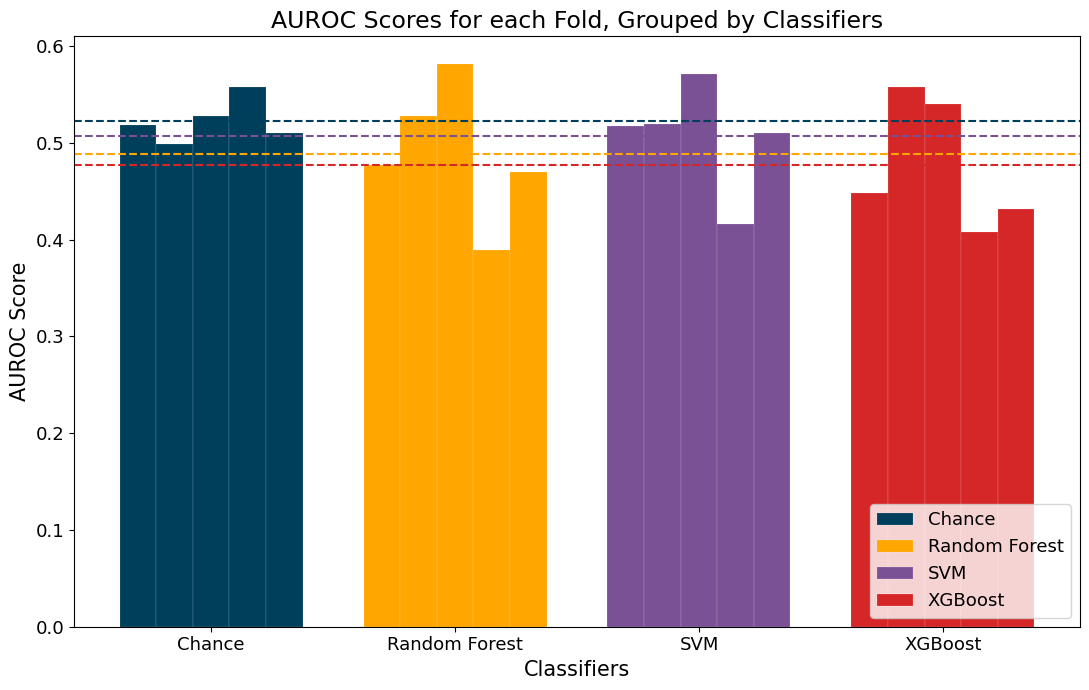

In [14]:
#AUROC
# Preparing the data
X = typical_no_null.drop(['Participant', 'Paragraph', 'TUT'], axis = 1)

y = typical_no_null['TUT']

# Identify majority and minority classes
majority_class = typical_no_null['TUT'].value_counts().idxmax()
minority_class = typical_no_null['TUT'].value_counts().idxmin()
print("Majority class", majority_class)
print("Minority class", minority_class)

# Separate majority and minority class samples
majority_indices = typical_no_null[typical_no_null['TUT'] == majority_class].index
minority_indices = typical_no_null[typical_no_null['TUT'] == minority_class].index

# precision_scorer = make_scorer(precision_score)

plt.figure(figsize=(11, 7)) 

precision_dict = {}
recall_dict = {}

# List of classifiers
classifiers = {
    'Chance': DummyClassifier(strategy="stratified"),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(random_state=42, probability=True), 
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
auroc_score_barplot = {name: [] for name in classifiers}

# Fit PCA to determine the number of components that explain 95% of the variance
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Plot cumulative explained variance to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components - 1, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.show()

# Parameters for tuning classifiers
param_grid_RF = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    }

param_grid_SVM = {
    'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}
    

param_grid_XGB = {
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

param_grids = {
    'Random Forest': param_grid_RF,
    'SVM': param_grid_SVM,
    'XGBoost': param_grid_XGB
}

# Define the number of folds for cross-validation
n_splits = 5

# Define the GroupKFold object
gkf = GroupKFold(n_splits=n_splits)

# Loop through the classifiers
for name, clf in classifiers.items():
    # Initialize lists to store evaluation metrics for each fold
    accuracy_scores = []
    weighted_f1_scores = []
    precision_scores = []
    recall_scores = []
    auroc_scores = []
    confusion_matrices = []
    prediction_rates = []

    # Perform cross-validation
    for train_index, test_index in gkf.split(X, y, groups=typical_no_null['Participant']):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply PCA on the training data
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i}' for i in range(X_train_pca.shape[1])])

        
        # Perform oversampling on minority class
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_df, y_train)

        
#         print(f"Before SMOTE: {Counter(y_train)}")
#         print(f"After SMOTE: {Counter(y_train_resampled)}")

        # Apply the transformation to the test data
        X_test_pca = pca.transform(X_test)
        X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i}' for i in range(X_test_pca.shape[1])])

        
        # Perform hyperparamenter tuning and train classifiers on best parameters
        if name != "Chance":
            grid = GridSearchCV(clf, param_grids[name], refit=True, verbose=3, scoring='roc_auc', n_jobs=-1)
            grid.fit(X_train_resampled, y_train_resampled)
            best_clf = grid.best_estimator_
            best_clf = best_clf.fit(X_train_resampled, y_train_resampled)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test_pca_df)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test_pca_df)[:, 1] 

        else:
            best_clf = clf.fit(X_train, y_train)
            # Perform prediction on test data
            y_pred = best_clf.predict(X_test)

            # Calculating predicted probabilities for AUROC
            y_pred_proba = best_clf.predict_proba(X_test)[:, 1] 


        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        weighted_f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  
        recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        auroc = roc_auc_score(y_test, y_pred_proba) 
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        prediction_rate = (confusion_matrix[1, 1] + confusion_matrix[0, 1]) / (confusion_matrix[1, 1] + confusion_matrix[1, 0] + confusion_matrix[0, 1] + confusion_matrix[0, 0])

        
        # Append evaluation metrics to lists
        accuracy_scores.append(accuracy)
        weighted_f1_scores.append(weighted_f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        auroc_scores.append(auroc)
        confusion_matrices.append(confusion_matrix)
        prediction_rates.append(prediction_rate)

        #barplot for AUROC
        auroc_score_barplot[name].append(auroc)
        
    
    # Calculate average evaluation metrics across all folds
    avg_accuracy = np.mean(accuracy_scores)
    avg_weighted_f1 = np.mean(weighted_f1_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_auroc = np.mean(auroc_scores)
    avg_confusion_matrix = np.mean(confusion_matrices, axis=0)
    avg_prediction_rate = np.mean(prediction_rates)

    
    # Output the average evaluation metrics for each classifier
    print(f"{name} Results:")
    print(f"Avg Accuracy: {avg_accuracy:.2f}")
    print(f"Avg Weighted F1 Score: {avg_weighted_f1:.2f}")
    print(f"Avg Precision_1: {avg_precision:.2f}")
    print(f"Avg Recall_1: {avg_recall:.2f}")
    print(f"Avg AUROC: {avg_auroc:.2f}")
    print("Avg Confusion Matrix:")
    print(avg_confusion_matrix)
    print(f"Avg Prediction Rate: {avg_prediction_rate:.2f}\n")

    # Store the average precision and recall for each classifier in a dictionary
    precision_dict[name] = avg_precision
    recall_dict[name] = avg_recall
    

# List of colors for each classifier
colors = ['#003F5C', '#FFA600', '#7A5195', '#D62728']

# Plot bar charts for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Precision plot
ax[0].bar(precision_dict.keys(), precision_dict.values(), color=colors)
ax[0].set_title('Precision Scores by Classifier')
ax[0].set_xlabel('Classifier')
ax[0].set_ylabel('Precision Score')
ax[0].set_ylim([0, 1])

# Recall plot
ax[1].bar(recall_dict.keys(), recall_dict.values(), color=colors)
ax[1].set_title('Recall Scores by Classifier')
ax[1].set_xlabel('Classifier')
ax[1].set_ylabel('Recall Score')
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


# Plot bar chart for AUROC
fig, ax = plt.subplots(figsize=(11, 7))
bar_width = 0.15  
gap_width = 0.05 

bar_positions = np.arange(len(classifiers)) * (n_splits * (bar_width + gap_width))

for idx, name in enumerate(classifiers):
    scores = auroc_score_barplot[name]
    avg_score = np.mean(scores)
    for fold_idx, score in enumerate(scores):
        bar_pos = bar_positions[idx] + (fold_idx * bar_width)
        ax.bar(bar_pos, score, bar_width, label=name if fold_idx == 0 else "",
               color=colors[idx], edgecolor='white', linewidth=0.1, alpha=1)
    ax.axhline(y=avg_score, color=colors[idx], linestyle='dashed', linewidth=1.5)
ax.set_xlabel('Classifiers', fontsize=15)
ax.set_ylabel('AUROC Score', fontsize=15)
ax.set_title('AUROC Scores for each Fold, Grouped by Classifiers', fontsize=17)

ax.set_xticks(bar_positions + ((n_splits * bar_width) / 2) - (bar_width / 2))
ax.set_xticklabels(classifiers.keys())

# Increasing the font size for tick labels and legend
ax.tick_params(axis='both', which='major', labelsize=13)


ax.legend(loc='lower right', fontsize=13)

plt.tight_layout()


# MORE ANALYSIS

In [7]:
# List of DataFrames
dataframes = [typical_no_null, divergent_no_null]

def calculate_statistics(df, label_column='TUT'):
    num_participants = df['Participant'].nunique()
    num_instances = len(df)
    positive_class_percentage = (df[label_column].sum() / num_instances) * 100
    return num_participants, num_instances, positive_class_percentage

for i, df in enumerate(dataframes, start=1):
    num_participants, num_instances, positive_percentage = calculate_statistics(df)
    print(f"Dataset D{i}:")
    print(f"  Number of participants = {num_participants}")
    print(f"  Number of instances = {num_instances}")
    print(f"  Base rate = {positive_percentage:.2f}%\n")

Dataset D1:
  Number of participants = 161
  Number of instances = 998
  Base rate = 26.45%

Dataset D2:
  Number of participants = 156
  Number of instances = 980
  Base rate = 38.67%

